# Content and Objectives

- Basic simulation showing how to get BER curves
- Antipodal and orthogonal symbols are sent; ML detection (nearest neighbor) is applied as decision criterion

# Importing

In [1]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# max. numbers of errors and/or symbols
# used as loop condition for the simulation
max_errors = 1e2
max_syms = 1e5

# Eb/N0
EbN0_db_min = 0
EbN0_db_max = 12
EbN0_db_step = 2

# initialize Eb/N0 array
EbN0_db_range = np.arange( EbN0_db_min, EbN0_db_max, EbN0_db_step )
EbN0_range = 10**( EbN0_db_range / 10 )

# constellation points
mod_points_antip = [1, -1]     
mod_points_ortho = [1, 1j]     

# Simulation

In [4]:
# initialize BER arrays 
# NOTE: dtype is required since zeros_like(arg) is of same type as arg
ber_antip = np.zeros_like( EbN0_db_range, dtype=float)
ber_ortho = np.zeros_like( EbN0_db_range, dtype=float)

# theoretical ber for bpsk and orthogonal modulation as on slides
# NOTE: using sigma^2 = N0 / 2 which will be justified later in the slides
# NOTE: Q(x) = 1 - Phi( x )
ber_antip_theo = 1 - stats.norm.cdf( np.sqrt( 2 * EbN0_range ) ) 
ber_ortho_theo = 1 - stats.norm.cdf( np.sqrt( EbN0_range ) ) 

    
# loop for snr
for ind_snr, val_snr in enumerate( EbN0_range ):

    # initialize error counter
    num_errors_antip = 0
    num_errors_ortho = 0    
    num_syms = 0

    # get noise variance
    sigma2 = 1. / ( val_snr )  

    # loop for errors
    while ( num_errors_antip < max_errors and num_errors_ortho < max_errors and num_syms < max_syms ):

        # generate data and modulate by using look-up operation
        d = np.random.randint( 0, 2)
        s_antip = mod_points_antip[ d ] 
        s_ortho = mod_points_ortho[ d ]
        
        
        # add noise
        noise = np.sqrt( sigma2 / 2 ) * ( np.random.randn() + 1j * np.random.randn() )
        r_antip = s_antip + noise            
        r_ortho = s_ortho + noise
        
        
        # demod by comparing real part with 0
        d_est_antip = int( np.real( r_antip ) <= 0 )
        d_est_ortho = int( np.imag( r_ortho ) > np.real( r_ortho ) )

        # count errors
        num_errors_antip += int( d_est_antip != d )
        num_errors_ortho += int( d_est_ortho != d )
        
        
        # increase symbol counter
        num_syms += 1


    # ber as relative amount of errors
    ber_antip[ ind_snr ] = num_errors_antip / num_syms
    ber_ortho[ ind_snr ] = num_errors_ortho / num_syms
    
    print('Es/N0 planned (dB) = {:2.1f}\n'.format( 10*np.log10(val_snr) ) )

Es/N0 planned (dB) = 0.0

Es/N0 planned (dB) = 2.0

Es/N0 planned (dB) = 4.0

Es/N0 planned (dB) = 6.0

Es/N0 planned (dB) = 8.0

Es/N0 planned (dB) = 10.0



# Plotting

Text(0, 0.5, 'BER')

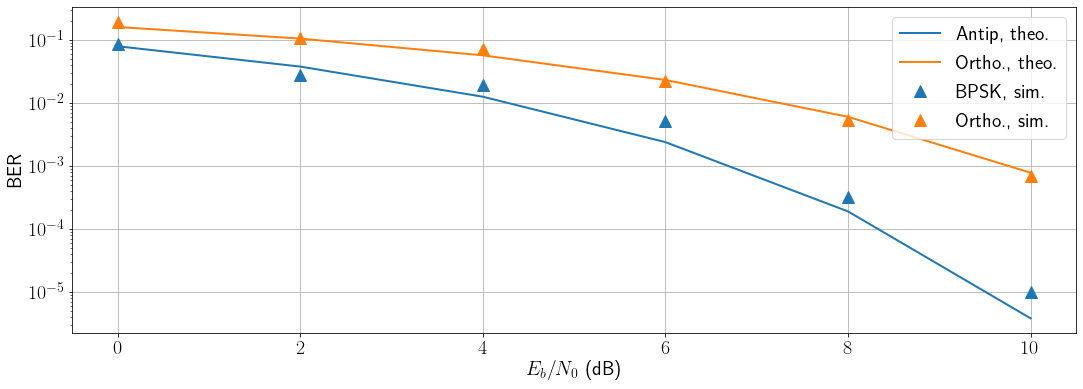

In [6]:
# plot theoretical values
ax_antip = plt.plot( EbN0_db_range, ber_antip_theo, linewidth=2.0, label = "Antip, theo.")
ax_ortho = plt.plot( EbN0_db_range, ber_ortho_theo, linewidth=2.0, label = "Ortho., theo.")


# get color and use same color for simulation
col_antip = ax_antip[0].get_color()  
plt.plot( EbN0_db_range, ber_antip, '^', color=col_antip, linewidth=2.0, markersize = 12, label = "BPSK, sim." )

col_ortho = ax_ortho[0].get_color()  
plt.plot( EbN0_db_range, ber_ortho, '^', color=col_ortho, linewidth=2.0, markersize = 12, label = "Ortho., sim." )


plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right') 

plt.xlabel('$E_b/N_0$ (dB)')
plt.ylabel('BER')

<b> Remark: </b>

Note that, by construction of the breaking condition in the while loop, estimated values for ber of orthogonal signaling are relatively more reliable than those for BPSK.